In [7]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
era = xr.open_dataset('../../../CRIACAO-HD/NOTA-PYTHON-LIRA/AulaGithub/tarefas_pedidos/ERA5_precipitacao_2023.nc')

In [9]:
era

<xarray.Dataset>
Dimensions:    (longitude: 189, latitude: 177, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -78.0 -77.75 -77.5 ... -31.5 -31.25 -31.0
  * latitude   (latitude) float32 7.0 6.75 6.5 6.25 ... -36.5 -36.75 -37.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [10]:
ds_SP = era.sel(latitude= slice(-19,-26), longitude = slice(-54,-44))



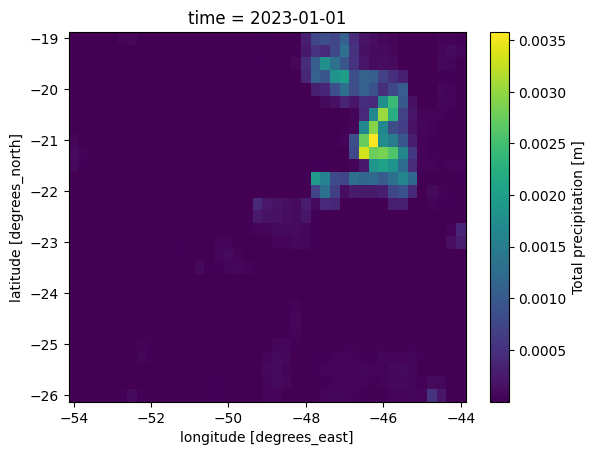

In [11]:
ds_SP['tp'][0].plot()

In [12]:
ds_SP.time.dt.daysinmonth

<xarray.DataArray 'days_in_month' (time: 8760)>
array([31, 31, 31, ..., 31, 31, 31])
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    long_name:  time

In [13]:
ds_SP.time

<xarray.DataArray 'time' (time: 8760)>
array(['2023-01-01T00:00:00.000000000', '2023-01-01T01:00:00.000000000',
       '2023-01-01T02:00:00.000000000', ..., '2023-12-31T21:00:00.000000000',
       '2023-12-31T22:00:00.000000000', '2023-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    long_name:  time

https://forum.ecmwf.int/t/total-precipitation-values-not-in-range-era5-land-hourly-data-from-1981-to-present/1128/14



*1000 1utc
prec

tp [mm]=tp [m]⋅1000

Total precipitation over the one hour ending at forecast step.

https://confluence.ecmwf.int/pages/viewpage.action?pageId=197702790

In [14]:
ds_SP['tp']= ds_SP['tp']*1000

In [15]:
#poderia fazer deste jeito usar este na proxima
#ds_SP_mensal =ds_SP.groupby('time.month').mean(dim = 'time')

In [16]:
# Crie uma nova variável 'month' a partir da variável 'time'
ds_SP['month'] = ds_SP['time'].dt.month


In [17]:

# Agora você pode agrupar por 'month' e somar
#ds_SP_mensal = ds_SP.groupby('month').sum()

In [18]:
ds_SP

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 29, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -54.0 -53.75 -53.5 ... -44.5 -44.25 -44.0
  * latitude   (latitude) float32 -19.0 -19.25 -19.5 ... -25.5 -25.75 -26.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 1.863e-06 ... 1.863e-06
    month      (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [19]:
# Agrupe os dados pela nova variável 'month' e some ao longo da dimensão 'time'
ds_SP_mensal = ds_SP.groupby('month').sum(dim='time')

#poderia fazer deste jeito
#ds_SP_mensal =ds_SP.groupby('time.month').mean(dim = 'time') 

In [20]:
ds_SP_mensal

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 29, month: 12)
Coordinates:
  * longitude  (longitude) float32 -54.0 -53.75 -53.5 ... -44.5 -44.25 -44.0
  * latitude   (latitude) float32 -19.0 -19.25 -19.5 ... -25.5 -25.75 -26.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp         (month, latitude, longitude) float32 202.2 267.8 ... 38.32 36.07
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [21]:
ds_SP_mensal.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  time

In [22]:
ds_SP_mensal.sel(month = 5)

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 29)
Coordinates:
  * longitude  (longitude) float32 -54.0 -53.75 -53.5 ... -44.5 -44.25 -44.0
  * latitude   (latitude) float32 -19.0 -19.25 -19.5 ... -25.5 -25.75 -26.0
    month      int64 5
Data variables:
    tp         (latitude, longitude) float32 32.08 32.35 35.6 ... 72.03 70.83
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [23]:
dezembro = ds_SP_mensal.sel(month = 12)

In [24]:
dezembro

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 29)
Coordinates:
  * longitude  (longitude) float32 -54.0 -53.75 -53.5 ... -44.5 -44.25 -44.0
  * latitude   (latitude) float32 -19.0 -19.25 -19.5 ... -25.5 -25.75 -26.0
    month      int64 12
Data variables:
    tp         (latitude, longitude) float32 86.34 94.4 99.66 ... 38.32 36.07
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

http://localhost:8888/notebooks/Documentos/Ambiental/ELEMENTO_QUIMICO/Plotar_atraves_pivot.ipynb

In [25]:
# Filtrar os dados 
df_dezembro = dezembro[['month', 'latitude', 'longitude',  'tp']].to_dataframe()
print(df_dezembro)

                    month          tp
latitude longitude                   
-19.0    -54.00        12   86.338936
         -53.75        12   94.399513
         -53.50        12   99.655678
         -53.25        12   99.136169
         -53.00        12  115.534714
...                   ...         ...
-26.0    -45.00        12   40.507160
         -44.75        12   40.602280
         -44.50        12   40.516693
         -44.25        12   38.320724
         -44.00        12   36.065773

[1189 rows x 2 columns]


In [26]:
df_dezembro.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1189 entries, (-19.0, -54.0) to (-26.0, -44.0)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   1189 non-null   int64  
 1   tp      1189 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 18.2 KB


In [27]:
df_dezembro=df_dezembro.reset_index()

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [29]:

#mapa teste
#%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
#https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

# Carregue o shapefile como um GeoDataFrame
shapefile_path = '../SP_municipios/SP_Municipios_2022.shp'  
base_sp = gpd.read_file(shapefile_path)



In [30]:
import calendar

# Obter a lista de meses em inglês
meses_ingles = list(calendar.month_name)[1:]
# Imprimir a lista de meses em inglês
print(meses_ingles)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [31]:
mes_numero = list(df_dezembro['month'].values)[0]
print(mes_numero)
mesinho =  mes_numero -1
print(mesinho)

12
11


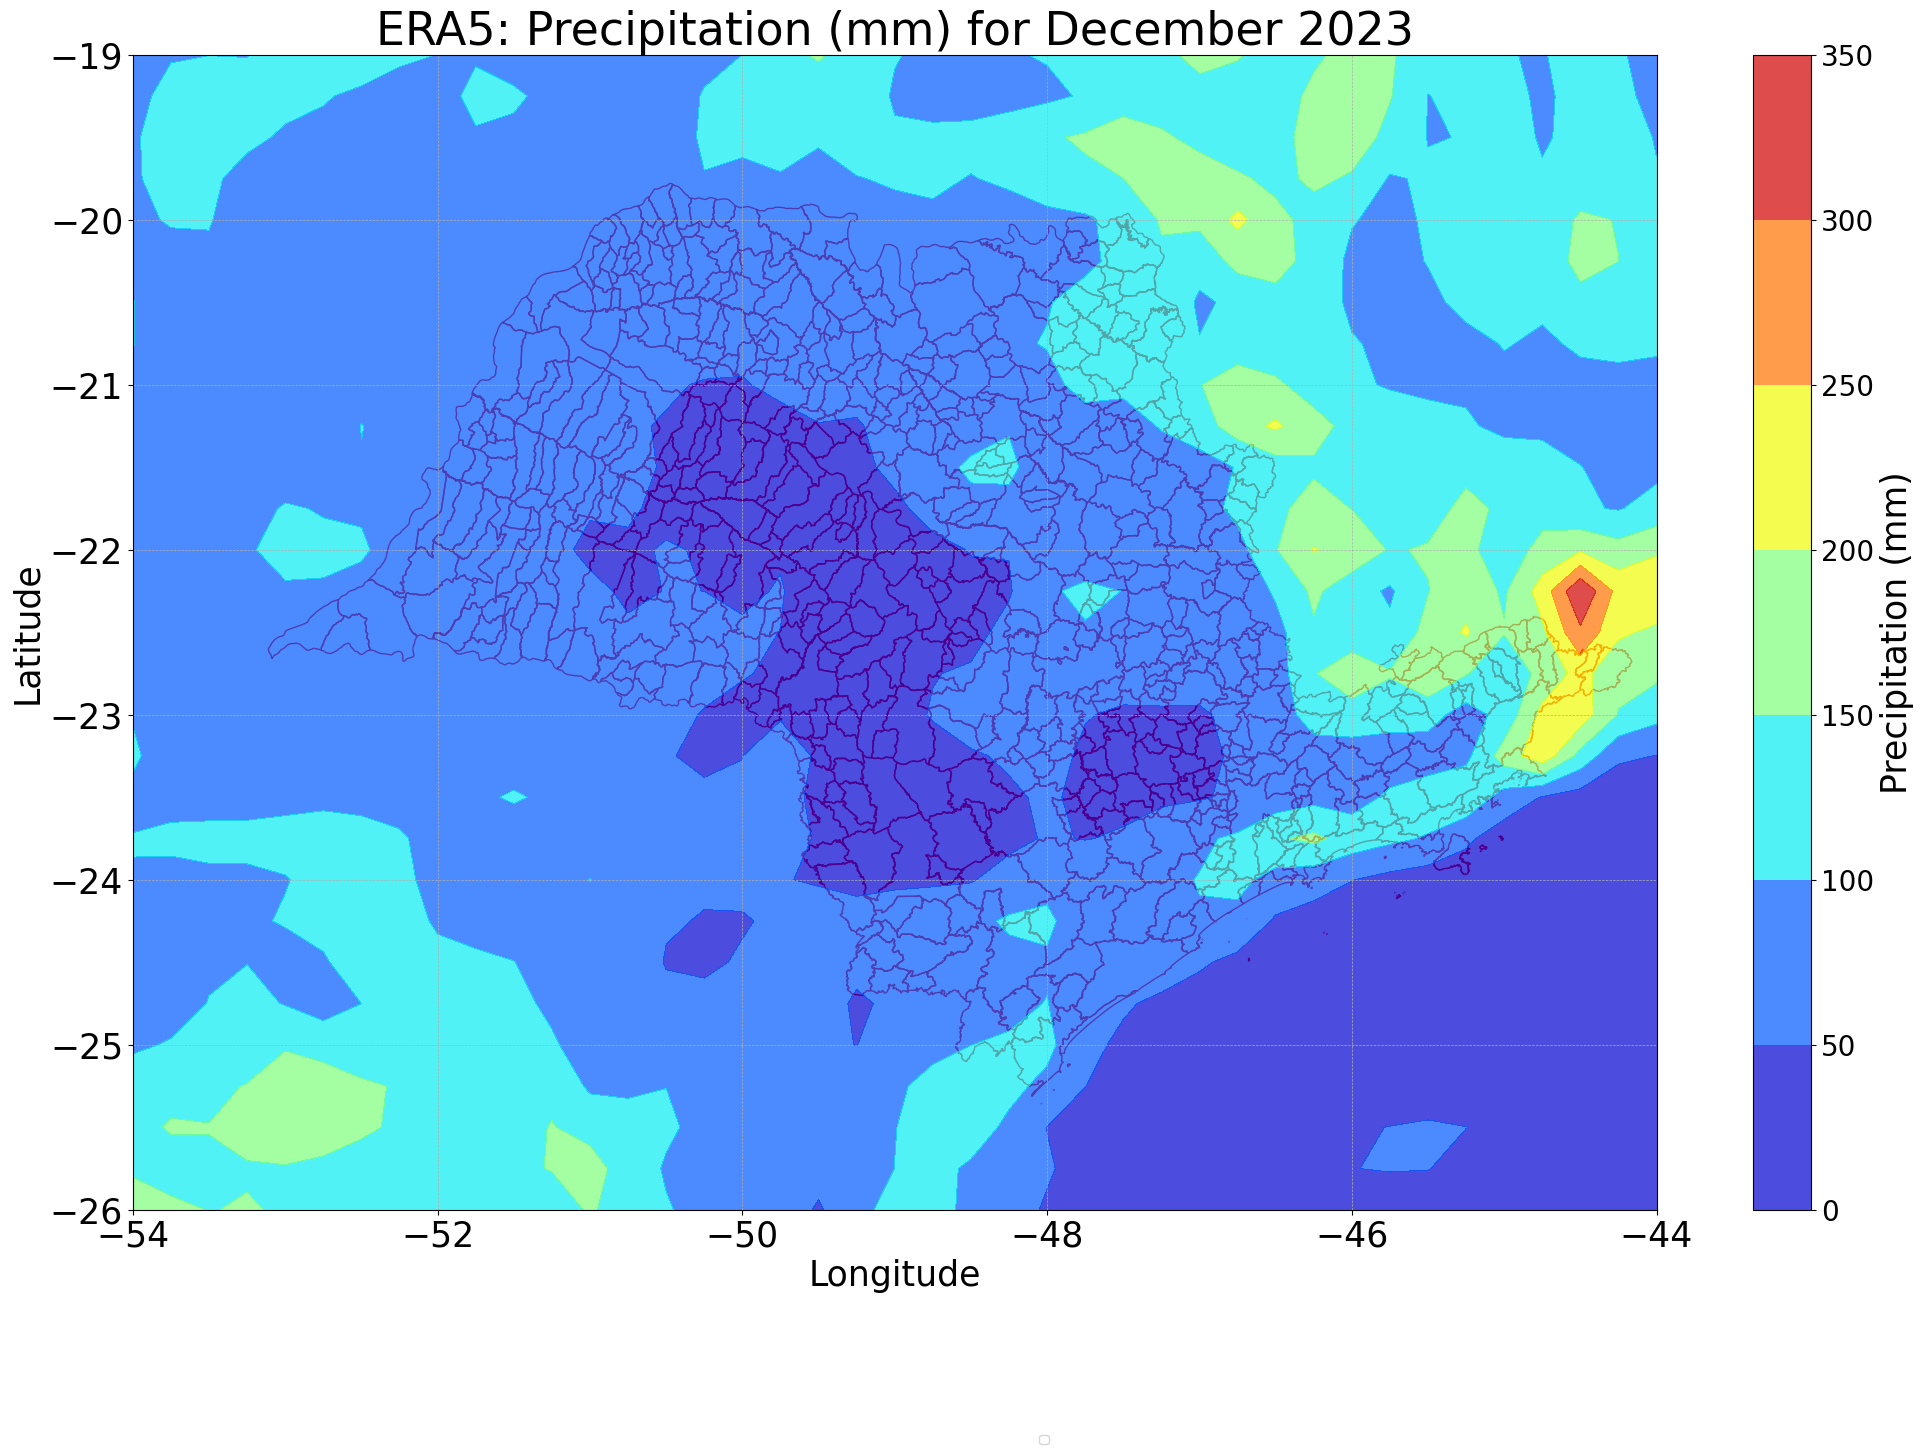

In [32]:
########========================Mapa ERA5=====================================================#
import pandas as pd
# Crie o gráfico de contorno
fig, ax = plt.subplots(figsize=(25,15))

# Configurar estilo de linha e cor para os municípios
base_sp.plot(ax=ax, color='none', edgecolor='red', linewidth=1.0)  # Defina a cor da borda aqui

# Pivotar os dados
hdfpivot = pd.pivot_table(df_dezembro, values='tp', index='latitude', columns='longitude')

# Obter os valores de X, Y e Z
X = hdfpivot.columns.values
Y = hdfpivot.index.values
Z = hdfpivot.values

# Criar um meshgrid
Xi, Yi = np.meshgrid(X, Y)

# Criar o gráfico de contorno
#contour = plt.contourf(Xi, Yi, Z, alpha=0.7, cmap=plt.cm.jet, vmin=0.0E-04, vmax=2.5E-04)
contour = plt.contourf(Xi, Yi, Z, alpha=0.7, cmap=plt.cm.jet)
    
# Adicionar uma barra de cores e definir os limites mínimo e máximo
cbar = plt.colorbar(contour, orientation='vertical', pad=0.05)
cbar.set_label(f'Precipitation (mm)', fontsize=25)



# Ajustar o tamanho dos números na legenda da colorbar
cbar.ax.tick_params(axis='y', labelsize=20)
    
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#aumentar marcador de eixo
ax.tick_params(axis='both', which='major', labelsize=25)

# Configurar rótulos e título
plt.xlabel('Longitude', fontsize=25)
plt.ylabel('Latitude', fontsize=25)
plt.title('ERA5: Precipitation (mm) for {} 2023'.format(meses_ingles[mesinho]), fontsize=33)


# Adicionar uma legenda abaixo da figura
handles,labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05), fontsize='small')

plt.show()

# múltiplos dados 

In [33]:
#
mes_0 = 9
for i in range(4):
    mes = mes_0 + i
    #print(mes)
    # df_mensal = ds_SP_mensal.sel(month = 12)

    for a in range(2): 
       for j in range(2):        
          print(mes,a, j)
          

9 0 0
9 0 1
9 1 0
9 1 1
10 0 0
10 0 1
10 1 0
10 1 1
11 0 0
11 0 1
11 1 0
11 1 1
12 0 0
12 0 1
12 1 0
12 1 1


In [34]:
mes_0 = 9

# Loop para percorrer os valores de a e j e calcular mes
for a in range(2): 
    for j in range(2):        
        mes = mes_0 + 2 * a + j
        print(mes, a, j)


9 0 0
10 0 1
11 1 0
12 1 1


In [35]:
ds_SP_mensal

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 29, month: 12)
Coordinates:
  * longitude  (longitude) float32 -54.0 -53.75 -53.5 ... -44.5 -44.25 -44.0
  * latitude   (latitude) float32 -19.0 -19.25 -19.5 ... -25.5 -25.75 -26.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp         (month, latitude, longitude) float32 202.2 267.8 ... 38.32 36.07
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-12 01:09:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

9 0 0
                    month         tp
latitude longitude                  
-19.0    -54.00         9  20.516582
         -53.75         9  28.161381
         -53.50         9  36.838245
         -53.25         9  43.956024
         -53.00         9  46.008484
...                   ...        ...
-26.0    -45.00         9  23.771692
         -44.75         9  22.480501
         -44.50         9  20.764019
         -44.25         9  18.819159
         -44.00         9  17.210253

[1189 rows x 2 columns]
9
8
10 0 1
                    month          tp
latitude longitude                   
-19.0    -54.00        10   34.358311
         -53.75        10   56.174885
         -53.50        10   41.713238
         -53.25        10   39.939674
         -53.00        10   55.042549
...                   ...         ...
-26.0    -45.00        10  149.525955
         -44.75        10  126.591530
         -44.50        10  108.896744
         -44.25        10   96.532898
         -44.00      

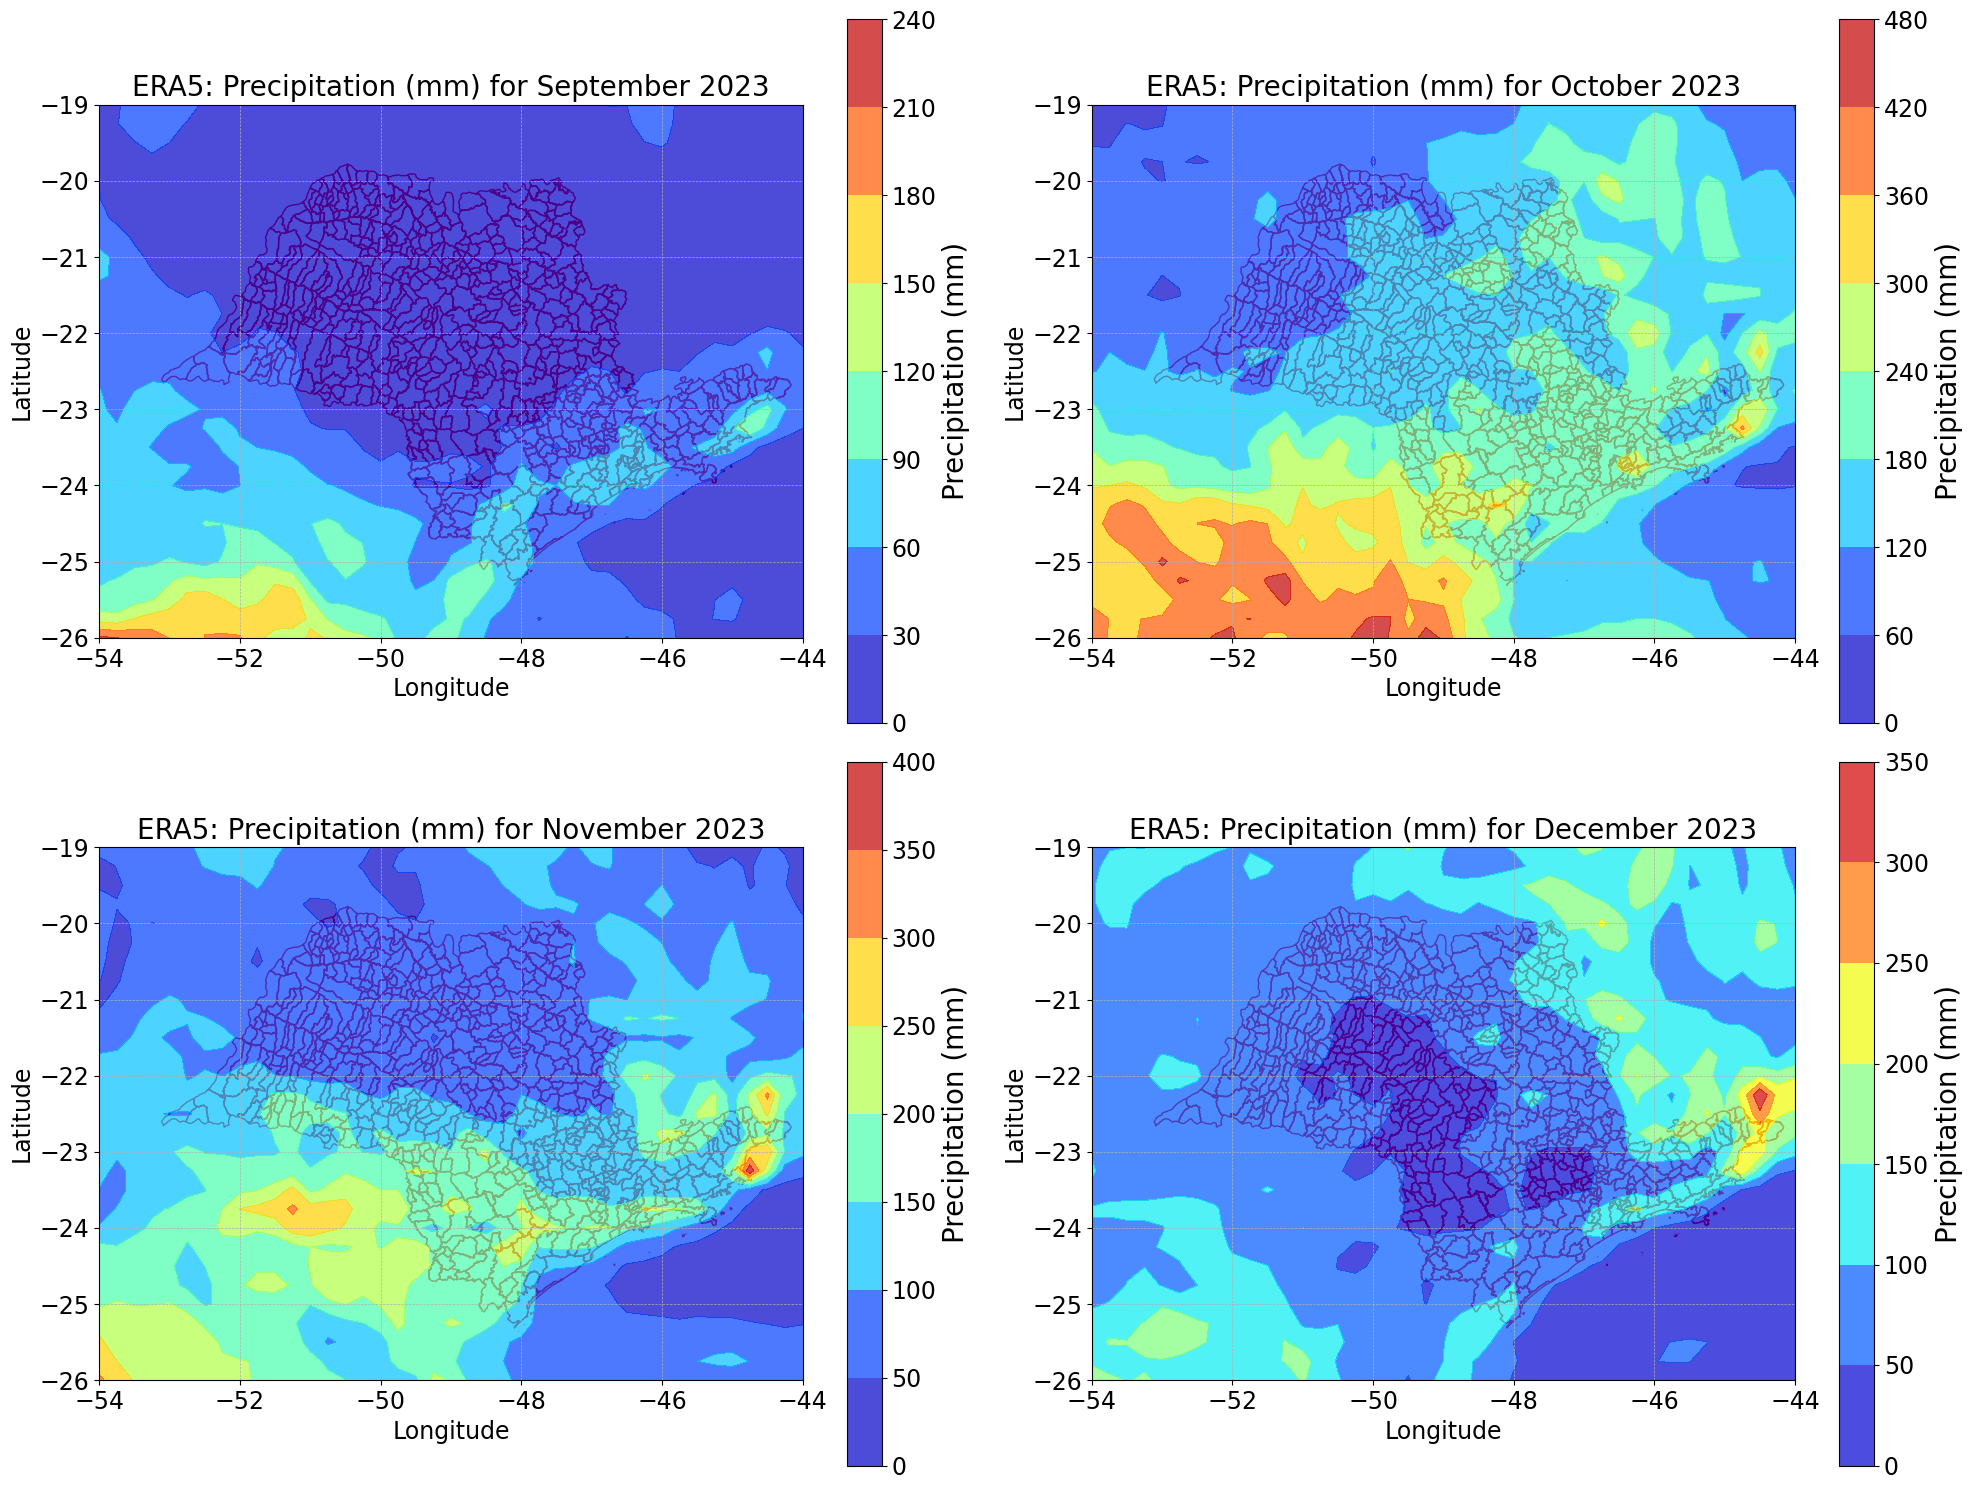

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supondo que ds_SP_mensal e meses_ingles estejam definidos em seu contexto
# ds_SP_mensal: o dataset de onde você está extraindo os dados
# meses_ingles: lista com os nomes dos meses em inglês

# Função para criar o gráfico de contorno
def plot_contour(ax, df, title):
    # Pivotar os dados
    hdfpivot = pd.pivot_table(df, values='tp', index='latitude', columns='longitude')

    # Obter os valores de X, Y e Z
    X = hdfpivot.columns.values
    Y = hdfpivot.index.values
    Z = hdfpivot.values

    # Criar um meshgrid
    Xi, Yi = np.meshgrid(X, Y)

    # Configurar estilo de linha e cor para os municípios
    base_sp.plot(ax=ax, color='none', edgecolor='red', linewidth=1.0)  # Defina a cor da borda aqui

    # Criar o gráfico de contorno
    contour = ax.contourf(Xi, Yi, Z, alpha=0.7, cmap=plt.cm.jet)

    # Adicionar uma barra de cores e definir os limites mínimo e máximo
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Precipitation (mm)', fontsize=20)
    #aumento do número da legenda no mapa
    cbar.ax.tick_params(axis='y', labelsize=17)

    # Configurar rótulos e título
    ax.set_xlabel('Longitude', fontsize=17)
    ax.set_ylabel('Latitude', fontsize=17)
    ax.set_title(title, fontsize=20)

    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    #aumentar o número do grid dos eixos
    ax.tick_params(axis='both', which='major', labelsize=17)

# Criar a figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

mes_0 = 9

# Loop para percorrer os valores de a e j e calcular mes
for a in range(2): 
    for j in range(2):        
        mes = mes_0 + 2 * a + j
        print(mes, a, j)
        df_mensal = ds_SP_mensal.sel(month=mes)
        # Filtrar os dados 
        df_mensal = df_mensal[['month', 'latitude', 'longitude',  'tp']].to_dataframe()
        print(df_mensal)
        df_mensal=df_mensal.reset_index()        
        mes_numero = list(df_mensal['month'].values)[0]
        print(mes_numero)
        mesinho = mes_numero - 1
        print(mesinho)
    
        # Plotar cada gráfico de contorno
        plot_contour(axs[a, j], df_mensal, 'ERA5: Precipitation (mm) for {} 2023'.format(meses_ingles[mesinho]))

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()